In [191]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment4_SVM.ipynb")

# CS385/CSD3185/CSD3186: Assignment 4 SVM

## Deliverables
Your submission for this assignment should be __ONE__ file - a zip file generated by the `grader.export(_)` function down below under 'Submission'. This function will auto create the zip file which contains this particular completed notebook file for you.  

Subsequently, rename your zip file like this: __coursecode_A4_your_full_name.zip__  
Eg. CS385_A4_john_doe.zip  

To complete this assignment, you should follow instructions in Section Tasks.

## IMPORTANT! READ THIS BEFORE STARTING...
- DO NOT delete existing cells, but you can add more cells in between.
- DO NOT modify the content of the existing cells unless otherwise stated.
- Run the cell with `grader.check(_)` to check your solutions whenever you have completed each tasks.
- Follow the file naming convention for the zip file as spelled out above strictly.
- DO NOT rename this notebook file. It shall be 'assignment1.ipynb'. 

Please adhere strictly to the instructions as stated above as failure to do so might result in deduction of marks by the autograder.
___

# Assignment Overview: Machine Learning Model Comparison

In this assignment, you will apply **Support Vector Machines (SVM)** alongside previously learned machine learning models—**Logistic Regression and Decision Tree**—to perform a comparative analysis. The goal is to evaluate and compare the performance of these models on a given dataset using various evaluation metrics. Through this process, you will gain a deeper understanding of how different classification algorithms perform under different conditions and learn to fine-tune models for optimal results.

## Notebook Structure:
Step 1: Data Loading & Cleaning [_2 marks_]

Step 2: Exploratory Data Analysis (EDA) [_10 marks_]

Step 3: Feature Engineering [_10 marks_]

Step 4: Data Preprocessing & Feature Selection [_64 marks_]

Step 5: Model Training & Selection [_14 marks_]

## Heart Disease Dataset (UCI)

The Heart Disease dataset is a widely used dataset from the UCI Machine Learning Repository. It contains medical data used to predict the presence of heart disease in patients. The dataset consists of multiple patient attributes, including demographic, clinical, and laboratory test results.

### Dataset Details  
- **Number of Features:** 13  
- **Target Variable:** `target` (1 = presence of heart disease, 0 = absence of heart disease)  
- **Type:** Classification  

### Features  
| Feature | Description |
|---------|------------|
| `age` | Age of the patient (years) |
| `sex` | Sex of the patient (1 = male, 0 = female) |
| `cp` | Chest pain type (0-3, different types of angina and pain) |
| `trestbps` | Resting blood pressure (mm Hg) |
| `chol` | Serum cholesterol (mg/dL) |
| `fbs` | Fasting blood sugar > 120 mg/dL (1 = true, 0 = false) |
| `restecg` | Resting electrocardiographic results (0-2) |
| `thalach` | Maximum heart rate achieved |
| `exang` | Exercise-induced angina (1 = yes, 0 = no) |
| `oldpeak` | ST depression induced by exercise relative to rest |
| `slope` | Slope of the peak exercise ST segment (0-2) |
| `ca` | Number of major vessels colored by fluoroscopy (0-3) |
| `thal` | Thalassemia type (1 = normal, 2 = fixed defect, 3 = reversible defect) |
| `target` | Presence of heart disease (1 = disease, 0 = no disease) |

# Import Libraries

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Step1: Data Loading & Cleaning
**Tasks:**

- Load the dataset and check for **duplicates**.

- Remove duplicates (**1 duplicate exists** in `heart.csv`).

In [193]:
# Load data
df = pd.read_csv("heart.csv")

# Check duplicates
print("Initial shape:", df.shape[0])
print("Duplicate rows:", df.shape[0] - df.drop_duplicates().shape[0])  

# Drop duplicates
df = df.drop_duplicates()

Initial shape: 303
Duplicate rows: 1


In [194]:
grader.check("q1")

q1 results: All test cases passed!

In [195]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Step 2: Exploratory Data Analysis (EDA)
**Tasks:**

- Plot a histogram of **age** with **20 bins**.

- Plot **class distribution** of the target variable (**target**).

- Visualize **correlations** between features and the target using a **heatmap**.

- Identify **outliers** in **Cholesterol (chol)** and **ST depression (oldpeak)** using **boxplots**.

Customize labels and titles for clarity.

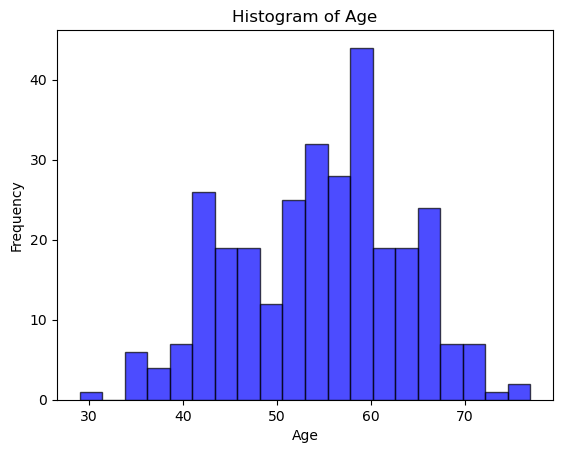

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
counts, bin_edges, _ = plt.hist(df['age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
# Customize labels and titles
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

Text(0.5, 1.0, 'Class Distribution')

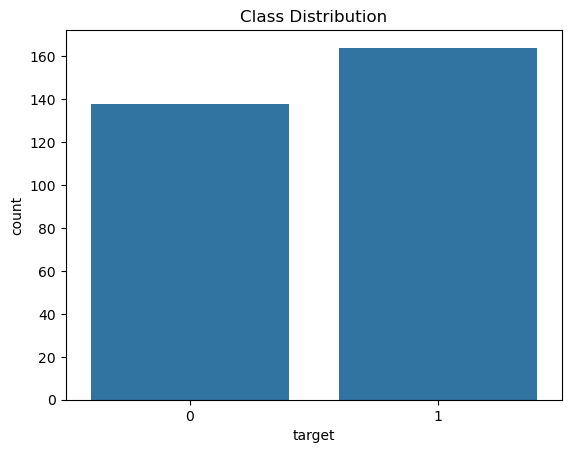

In [197]:
# Class distribution (countplot)
ax_count = sns.countplot(x='target', data=df)
# Customize title
ax_count.set_title('Class Distribution')

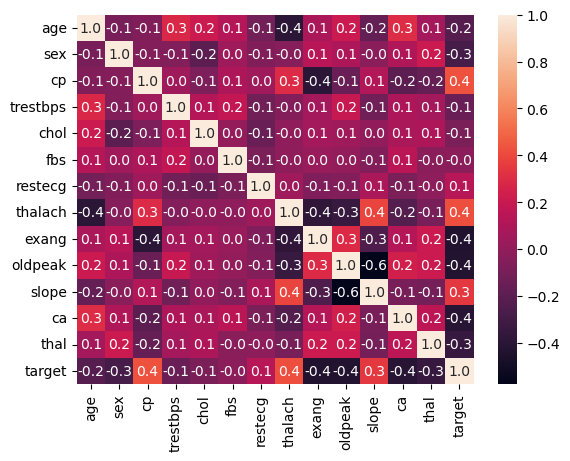

In [198]:
# Correlation heatmap
# Ensure each cell displays the correlation value (annot)
# The values are formatted to one decimal place (fmt)
ax = sns.heatmap(df.corr(), annot=True, fmt=".1f")

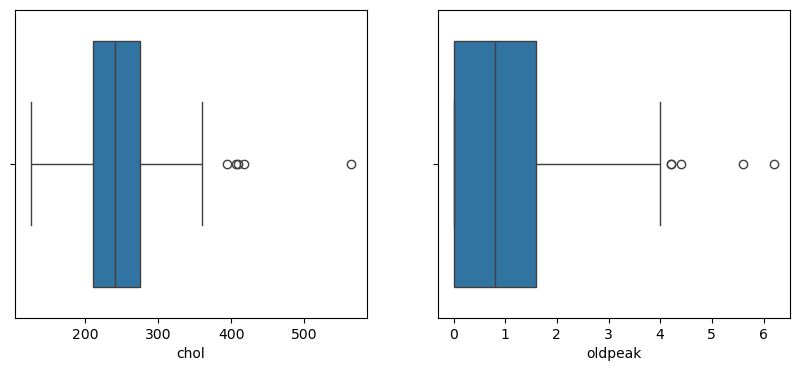

In [199]:
# Outliers (boxplots)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x=df['chol'])
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x=df['oldpeak'])

In [200]:
grader.check("q2")

q2 results: All test cases passed!

# Step 3: Feature Engineering
**Tasks:**

- **Bin** `age` into groups: `<=45`, `45-55`, `>55`, labelled as **'young'**, **'middle'**, **'senior'**. (Hint: use pd.cut())

- **Create interaction term** `age_chol` (**age × cholesterol**).

In [201]:
# Bin Age into Groups
# Bin Age into Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 45, 55, 100], labels=['young', 'middle', 'senior'], right=True)  # Intervals closed on the right

# Create Interaction Term
df['age_chol'] = df['age'] * df['chol']

In [202]:
grader.check("q3")

q3 results: All test cases passed!

# Step 4: Data Preprocessing & Feature Selection
**Tasks:**

- **Split Data** → Features (`X`) & Target (`y`)  
- **Train-Test Split** → 80% train, 20% test, use `random_state = 42` and `stratify = y`
- **Handle Outliers (Post Split!)** → IQR capping 'for `chol` & `oldpeak`  
- **One-Hot Encode** categorical variables (`cp, restecg, slope, thal, age_group`)  
- **Standardize Numerical Features** → `age, trestbps, chol, oldpeak, age_chol`  
- **Feature Selection (RFE + Logistic Regression)** → Keep top 10 features  (codes provided)

In [203]:
from sklearn.model_selection import train_test_split

# Split Data into Features (X) and Target (y)
X = df.drop(columns=['target'])
y = df['target']

# Train-Test Split (80% Train, 20% Test)
# Use random_state = 42 for reproducibility.
# Use stratify = y to ensure the train and test sets have similar class distributions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [204]:
# Data Preprocessing: Handling Outliers with IQR Method

def calculate_outlier_bounds(df, columns):
    """
    Calculate IQR-based outlier bounds using ONLY training data to prevent data leakage.
    
    IQR (Interquartile Range) Method:
    - Q1 (25th percentile): The value below which 25% of the observations are found
    - Q3 (75th percentile): The value below which 75% of the observations are found
    - IQR = Q3 - Q1: The range of the middle 50% of the data
    - Lower bound = Q1 - 1.5 * IQR: Values below this are considered outliers
    - Upper bound = Q3 + 1.5 * IQR: Values above this are considered outliers
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The training DataFrame containing numerical columns
    columns : list
        List of column names to calculate IQR bounds for
        
    Returns:
    --------
    bounds : dict
        Dictionary with column names as keys and their corresponding lower/upper bounds
    """
    # Initialize empty dictionary to store bounds for each column
    bounds = {}
   
    
    # Calculate bounds for each specified column
    for col in columns:
        # Calculate Q1 (25th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr
        
        # Store bounds for this column in the dictionary
        bounds[col] = {
            'lower': lower_bound,
            'upper': upper_bound
        }
    
    return bounds


def apply_outlier_bounds(df, columns, bounds):
    """
    Apply pre-calculated outlier bounds to a dataset (training or test).
    
    This function ensures we apply the SAME bounds to both training and test data,
    preventing data leakage by not calculating new bounds from test data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to apply outlier capping to (can be training or test set)
    columns : list
        List of column names to apply outlier capping to
    bounds : dict
        Dictionary of pre-calculated bounds from training data
        
    Returns:
    --------
    df_capped : pandas.DataFrame
        A new DataFrame with outliers capped at the specified bounds
    """
    # Create a copy to avoid modifying the original DataFrame
    df_capped = df.copy()

    # Apply capping to each specified column
    for col in columns:
        # Extract pre-calculated bounds for this column
        lower_bound = bounds[col]['lower']
        upper_bound = bounds[col]['upper']
        
        # Use np.clip to cap values at the lower and upper bounds
        # - Values below lower_bound will be set to lower_bound
        # - Values above upper_bound will be set to upper_bound
        # - Values within the range remain unchanged
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)

    return df_capped


# STEP 1: Define columns that need outlier handling
outlier_columns = ['chol', 'oldpeak']

# STEP 2: Calculate bounds using ONLY training data
outlier_bounds = calculate_outlier_bounds(X_train, outlier_columns)

# STEP 3:
# Apply the bounds to training data
X_train_capped = apply_outlier_bounds(X_train, outlier_columns, outlier_bounds)

# Apply the SAME bounds to test data (prevents data leakage)
X_test_capped = apply_outlier_bounds(X_test, outlier_columns, outlier_bounds)

# IMPORTANT: Replace original dataframes with capped versions
X_train = X_train_capped
X_test = X_test_capped

In [205]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group,age_chol
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,senior,17271
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,senior,16236
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,middle,11275
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,senior,19095
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,senior,12238


**Why it's better to use one-hot encoding here?**

Even if categorical variables are converted to numbers (e.g., 0, 1, 2), ML models might misinterpret them as having mathematical meaning.

**Problems with Numeric Encoding**:
1. Ordinal vs. Nominal: Some categories have an order (ordinal), while others don’t (nominal). Treating them as numbers can be misleading.
2. False Mathematical Relationships: ML models may assume numerical significance (e.g., ‘thal’ = 3 is three times ‘thal’ = 1).
3. Distance Misinterpretation: Algorithms like SVM use distances, leading to incorrect relationships between categories.

In [ ]:
# One-Hot Encoding for Categorical Features
from sklearn.preprocessing import OneHotEncoder

# Step 1: Identify categorical features requiring one-hot encoding
encoded_features =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']

# Step 2: Initialize one-hot encoder (drop first category to avoid multicollinearity)
# Set drop='first' removes one column per feature to avoid perfect multicollinearity
# Set sparse_output = False, which is equivalent to calling .toarray()
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Step 3: Fit on training data and transform both train and test sets
# Create a DataFrame with proper column names for the encoded features 
# - encoder.fit_transform() learns categories from AND transforms training data
# - encoder.get_feature_names_out() provides clear column names for the encoded features 
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[encoded_features]), columns=encoder.get_feature_names_out(encoded_features))

# Important: We only transform test data (not fit_transform) to prevent data leakage
X_test_encoded = pd.DataFrame(encoder.transform(X_test[encoded_features]) , columns=encoder.get_feature_names_out(encoded_features))

# Step 4: Identify remaining features (those not selected for one-hot encoding)
remaining_features = X_train.columns.difference(encoded_features)

# Step 5: Concatenate remaining features and one-hot encoded categorical features
X_train = pd.concat([X_train[remaining_features], X_train_encoded], axis=1)
X_test = pd.concat([X_test[remaining_features], X_test_encoded], axis=1)

In [207]:
X_train.head()

,age,age_chol,chol,oldpeak,thalach,trestbps,sex_1,cp_1,cp_2,cp_3,...,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,age_group_senior,age_group_young
59,57.0,17271.0,303.0,0.0,159.0,128.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
247,66.0,16236.0,246.0,0.0,120.0,160.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,55.0,11275.0,205.0,2.0,130.0,128.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,57.0,19095.0,335.0,3.0,143.0,110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,58.0,12238.0,211.0,0.0,165.0,140.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [208]:
# Standardize Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = remaining_features

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [209]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        ✅ Test case passed

    q4 - 2 result:
        ✅ Test case passed

    q4 - 3 result:
        ❌ Test case failed
        Trying:
            for col in encoded_features:
                assert col not in X_train.columns, f"Original categorical column '{col}' still exists in training set"
                assert col not in X_test.columns, f"Original categorical column '{col}' still exists in test set"
        Expecting nothing
        ok
        Trying:
            for col in remaining_features:
                assert col in X_train.columns, f"Numerical column '{col}' is missing from training set"
                assert col in X_test.columns, f"Numerical column '{col}' is missing from test set"
        Expecting nothing
        ok
        Trying:
            encoded_cols = ['cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'age_group_senior', 'age_group_young']
        Expecting nothing
        ok
        Trying:
            train_encoded_values = X_train[encoded_cols].values.flatten()
        Expecting nothing
        ok
        Trying:
            test_encoded_values = X_test[encoded_cols].values.flatten()
        Expecting nothing
        ok
        Trying:
            assert set(np.unique(train_encoded_values)) <= {0, 1}, 'Training set encoded values are not binary'
        Expecting nothing
        **********************************************************************
        Line 10, in q4 2
        Failed example:
            assert set(np.unique(train_encoded_values)) <= {0, 1}, 'Training set encoded values are not binary'
        Exception raised:
            Traceback (most recent call last):
              File "c:\ProgramData\anaconda3\Lib\doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 2[5]>", line 1, in <module>
                assert set(np.unique(train_encoded_values)) <= {0, 1}, 'Training set encoded values are not binary'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Training set encoded values are not binary
        Trying:
            assert set(np.unique(test_encoded_values)) <= {0, 1}, 'Test set encoded values are not binary'
        Expecting nothing
        **********************************************************************
        Line 11, in q4 2
        Failed example:
            assert set(np.unique(test_encoded_values)) <= {0, 1}, 'Test set encoded values are not binary'
        Exception raised:
            Traceback (most recent call last):
              File "c:\ProgramData\anaconda3\Lib\doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 2[6]>", line 1, in <module>
                assert set(np.unique(test_encoded_values)) <= {0, 1}, 'Test set encoded values are not binary'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Test set encoded values are not binary
        Trying:
            assert X_train.shape[1] == 25, 'The shape of X_train after encoding is not correct'
        Expecting nothing
        ok
        Trying:
            assert X_test.shape[1] == 25, 'The shape of X_test after encoding is not correct'
        Expecting nothing
        ok

    q4 - 4 result:
        ✅ Test case passed

### Introduction to RFE (Recursive Feature Elimination) [Codes Provided]
**Recursive Feature Elimination (RFE)** is a feature selection technique that helps identify the most important features for a machine learning model. It works by:

1. **Training a model** on all features.
2. **Ranking features** based on their importance (using model coefficients or feature importance scores).
3. **Eliminating the least important feature(s)** and repeating the process until the desired number of features is reached.

**Why use RFE?**

- Reduces overfitting by removing irrelevant features.
- Improves model interpretability.
- Enhances computational efficiency.

It is commonly used with models like **Logistic Regression**, **Decision Trees**, and **SVM** to optimize performance. In our example, we will use RFE with Logistic regression. 

The selected features are:
```python
['exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3']
```

In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Adjust based on desired number of features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)  # Apply the same transformation to test set

# Print selected feature indices
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")

# Step 5: Model Training & Selection
**Tasks:**
- Train and evaluate multiple classification models using `X_train_selected`, `X_test_selected`, `y_train`, and `y_test.`
- Perform hyperparameter tuning using **GridSearchCV** to optimize model performance.
- Select the best model based on **cross-validation score** and evaluate it on test data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# Step 1: Initialize Models & Parameter Grids (codes provided)
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
} 

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Step 2: Hyperparameter Tuning with Cross-validation
best_models = {}
cv_scores = {}  # Store cross-validation scores for each model

for name, model in models.items():
    print(f"\nPerforming Grid Search for {name}")

    grid_search = GridSearchCV(
        ...
        ...
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit on training data
    ...

    # Store the best estimator
    best_models[name] = ...
    # Store the best cross-validation score
    cv_scores[name] = ...

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {cv_scores[name]:.4f}")

# Step 3: Select the best model based on CV score
best_model_name = max(cv_scores, key=cv_scores.get)  # Model with highest CV score
# Retrieve the best trained model object from best_models dictionary
best_model = ...

print(f"\nBest model based on cross-validation: {best_model_name}")

In [ ]:
# Step 4: Evaluate the Best Model on Test Data
y_pred = ...

test_accuracy = ...

print(f"\nTest Accuracy of {best_model_name}: {test_accuracy:.4f}")
print("\nClassification Report:")
# print classification report
...

In [ ]:
grader.check("q5")

In [ ]:
# Learning Curves to Check for Overfitting/Underfitting (codes provided)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes_array = np.linspace(0.1, 1.0, 10)  # Renamed to avoid overwriting
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes_array, scoring='accuracy'
    )
    
    # Compute mean and standard deviation for both training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    plt.grid()

    # Plot shaded areas representing standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    # Plot mean scores
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()  # Ensure the plot is displayed inside the function

# Plot learning curve for the best model
plot_learning_curve(best_model, f"Learning Curve for {best_model_name}", X_train_selected, y_train)


**How to Interpret the Results**:

- Overfitting: If there's a large gap between training score (red) and cross-validation score (green), with training score much higher
- Underfitting: If both training and cross-validation scores are low and relatively close
- Good fit: If both training and cross-validation scores are high and relatively close

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)